In [1]:
import os
import voc12.my_dataloader
from utility import image_util, util
from torch.utils.data import DataLoader
import torch
from misc import imutils
import importlib
import torch.nn.functional as F
import numpy as np
import importlib
import voc12.dataloader
import importlib
from tqdm import tqdm
from misc import indexing

from PIL import Image

In [2]:
device = "cuda:0"
beta = 10
exp_times = 8
radius = 5

infer_list = "voc12/val.txt"
irn_network = "net.resnet50_irn"
irn_weights_name = "../sess/voc_sess/resnet50_irn"
voc12_root = "../Dataset/VOC2012/"
cam_out_dir = "../irn_result/cam/"

In [3]:
model = getattr(importlib.import_module(irn_network), 'EdgeDisplacement')()
    
model.load_state_dict(torch.load(irn_weights_name+".pth"), strict=False)
    
model.eval()

dataset = voc12.dataloader.VOC12ClassificationDatasetMSF(infer_list,
                                                            voc12_root=voc12_root,
                                                            scales=(1.0,))

model = model.to(device)

data_loader = DataLoader(dataset,
                             shuffle=False, num_workers=os.cpu_count(), pin_memory=False)


C:\Users\user\AppData\Local\Temp\ipykernel_24736\660876577.py:7: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  org_img_size = np.asarray(pack['size'])
C:\Users\user\AppData\Local\Temp\ipykernel_24736\660876577.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  org_img_size = np.asarray(pack['size'])


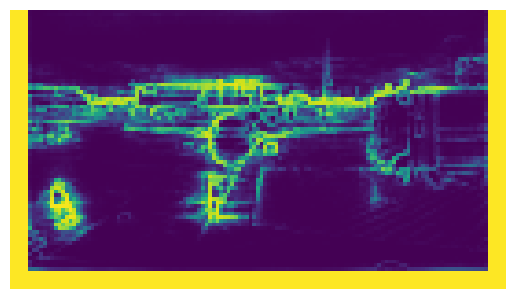

torch.Size([1, 34, 9144])
tensor([[[0.0109, 0.0016, 0.0019,  ..., 0.0039, 0.0037, 0.0305],
         [0.0087, 0.0039, 0.0024,  ..., 0.0043, 0.0047, 0.0109],
         [0.0138, 0.0029, 0.0016,  ..., 0.0032, 0.0046, 0.0256],
         ...,
         [0.1103, 0.0234, 0.0076,  ..., 0.0108, 0.0047, 0.0149],
         [0.0827, 0.0182, 0.0235,  ..., 0.0186, 0.0120, 0.0354],
         [0.3369, 0.3504, 0.3278,  ..., 0.2194, 0.2101, 0.1866]]],
       device='cuda:0')


In [9]:
data_loader = DataLoader(dataset)

with torch.no_grad():
    pack = next(iter(data_loader))
    
    name = voc12.dataloader.decode_int_filename(pack['name'][0])
    org_img_size = np.asarray(pack['size'])
    depth_img = cv2.imread(os.path.join(depth_root, name+'.png'), cv2.IMREAD_GRAY)
    
    cam_dict = np.load(os.path.join(cam_out_dir, name+'.npy'), allow_pickle=True).item()
    
    cams = cam_dict['cam']
    
    keys = np.pad(cam_dict['keys']+1, (1,0), mode = 'constant')
    cam_downsized_values = cams.to(device)
    
    rw = propagate_to_edge(cam_downsized_values, edge, beta=beta, exp_times=exp_times,
                          radius=5, device=device)
    print(edge)
    
    